Substituting missing value in airbnb dataset

In [1]:
import pandas as pd
df = pd.read_csv('airbnb_rooms.csv')
df.duplicated().any()

False

In [2]:
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('airbnb_rooms.csv')


for col in df.select_dtypes(exclude=['object']).columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].replace(np.NaN, df[col].median())
for col in df.select_dtypes(include=['object']).columns:
     if df[col].isna().sum() > 0:
         mode = df[col].mode()[0]  # compute the mode of the column
         df[col] = df[col].fillna(mode)

df.to_csv('airbnb_output.csv', index=False)


Label encoding

In [3]:
from sklearn import preprocessing   
df = pd.read_csv('airbnb_output.csv')
my_label = preprocessing.LabelEncoder()  
# df[ 'host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy' ]= my_label.fit_transform(df['host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy' ])
# print(df[ 'host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy''scrape_id','host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy' ].unique())  
# print(df) 
for i in ['host_identity_verified','neighbourhood_cleansed','is_location_exact','property_type','room_type','bed_type','cancellation_policy']:
    df[i]= my_label.fit_transform(df[i])
    print(df[i].unique())


# import category_encoders as ce

# categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# encoder = ce.BinaryEncoder(cols=categorical_cols)
# X_encoded = encoder.fit_transform(df[categorical_cols])
# X = pd.concat([df.drop(categorical_cols, axis=1), X_encoded], axis=1)
# df=X
# # df.to_csv('airbnb_out1.csv', index=False)
df.to_csv('airbnb_output.csv', index=False)


[1 0]
[18 19 32 31  1 17 26 13 11 27 29 12 30  3  5 24 21  7 23 22  4 15  8  9
  6  0 10 16 14 25 20  2 28]
[1 0]
[0 2 4 1 3]
[1 0]
[0]
[3 5 0 7 4 6 1 2]


In [4]:

df = pd.read_csv('airbnb_output.csv')

# Assuming df is your DataFrame containing the data
df['entertainment'] = df['cinema'] + df['theatre']

# Additional new features
df['property_size'] = df['bedrooms'] * df['accommodates']
# df['listing_density'] = df['property_size'] / df['availability_365']
df['nearby_amenities'] = df['restaurant'] + df['bar'] + df['pub']
df['amenities_count'] = df[['restaurant', 'bar', 'pub', 'hospital']].sum(axis=1)
df['religious_sites_count'] = df[['place_of_worship', 'museum']].sum(axis=1)
df['fun'] = df['bar'] + df['pub'] + df['nightclub']
df['historic'] = df['gallery']+df['museum']+df['place_of_worship']+df['artwork']


Deleting unwanted columns

In [5]:
df = df.drop(columns=['Unnamed: 0.5','Unnamed: 0.4','Unnamed: 0.3','Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','id','scrape_id','host_id','host_since','host_listings_count','host_total_listings_count','host_identity_verified','latitude','longitude','is_location_exact','guests_included','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_30','availability_60','availability_90','number_of_reviews','number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','cancellation_policy','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','geometry'], axis=1)

In [6]:
df.columns

Index(['Unnamed: 0.6', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'availability_365', 'viewpoint', 'restaurant', 'bar', 'pub', 'hospital',
       'cinema', 'nightclub', 'theatre', 'marketplace', 'place_of_worship',
       'artwork', 'attraction', 'gallery', 'information', 'museum',
       'picnic_site', 'entertainment', 'property_size', 'nearby_amenities',
       'amenities_count', 'religious_sites_count', 'fun', 'historic'],
      dtype='object')

Boxplot

In [7]:
#create a box plot
# import plotly.express as px
# fig = px.box(df, y=['neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds'])

# fig.show()

In [8]:
# #create a box plot
# import plotly.express as px
# fig = px.box(df, y='availability_365')

# fig.show()

In [9]:
# import plotly.express as px
# fig = px.box(df, y='price')

# fig.show()

In [10]:
# import plotly.express as px
# fig = px.box(df, y=['entertainment','property_size','nearby_amenities','attraction_density','religious_sites_count','fun','historic'])

# fig.show()

Deleting outlier values

In [11]:
def iqr_capping(df, cols , factor):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        ul = q3 + (factor * iqr)
        ll = q1 - (factor * iqr)
        
        df[col] = np.where(df[col]>ul , ul , np.where(df[col] <ll ,ll ,df[col]))

In [12]:

iqr_capping(df,['price','accommodates','bathrooms','bedrooms','beds','availability_365','entertainment','property_size','nearby_amenities','religious_sites_count','fun','historic'],1.5)

# df = df[df['price'] < ul]
# index = df[(df['price'] > 279)|(df['price'] < 47)].index
# df.drop(index, inplace=True)
# # df.loc[index,'price'] =df['price'].median()
# df['price'].describe()

In [13]:
def sub_med(cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        ul = q3 + (1.5* iqr)
        ll = q1 - (1.5 * iqr)
        index = df[(df[col] > ul)|(df[col] < ll)].index
        df.loc[index,col] =df[col].median()
        df[col].describe()

In [14]:
# p25 = df['accommodates'].quantile(0.25)
# p75 = df['accommodates'].quantile(0.75)
# iqr = p75 -p25
# ul = p75 + 1.5 * iqr
# ll = p25 - 1.5 * iqr

# df = df[df['accommodates'] < ul]
# df = df[df['accommodates'] > ll]
# df.shape
# sub_med(['accommodates'])

# index = df[(df['accommodates'] > 7)|(df['accommodates'] < 1)].index
# df.loc[index,'accommodates'] =df['accommodates'].median()
# df['accommodates'].describe()

In [15]:
# sub_med(['accommodates'])
# sub_med(['bathrooms'])
# sub_med(['bedrooms'])
# sub_med(['beds'])
# sub_med(['property_type'])
# sub_med(['room_type'])
# sub_med(['neighbourhood_cleansed'])
# sub_med(['availability_365'])

In [16]:
# import plotly.express as px
# fig = px.box(df, y=['neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds'])

# fig.show()

In [17]:

# import plotly.express as px
# fig = px.box(df, y=['entertainment','property_size','nearby_amenities','fun','historic'])

# fig.show()

In [18]:
# 'nearby_amenities','attraction_density','religious_sites_count','has_marketplace'

# import plotly.express as px
# fig = px.box(df, y=['nearby_amenities','attraction_density','religious_sites_count','has_marketplace'])

# fig.show()

In [19]:
# import plotly.express as px
# fig = px.box(df, y='price')

# fig.show()

In [20]:
# import plotly.express as px
# fig = px.box(df, y=['artwork','attraction','gallery','information','museum','picnic_site','viewpoint'])

# fig.show()

In [21]:
iqr_capping(df,['artwork','attraction','gallery','information','museum','picnic_site','viewpoint'],1.5)


In [22]:
# sub_med('artwork')
# sub_med('attraction')
# sub_med('gallery')
# sub_med('information')
# sub_med('museum')
# sub_med('viewpoint')

In [23]:
# import plotly.express as px
# fig = px.box(df, y=['artwork','attraction','gallery','information','museum','picnic_site','viewpoint'])

# fig.show()

In [24]:
# import plotly.express as px
# fig = px.box(df, y='restaurant')

# fig.show()


In [25]:
# import plotly.express as px
# fig = px.box(df, y=['bar','pub','hospital','cinema','nightclub','theatre','marketplace','place_of_worship'])

# fig.show()

In [26]:
iqr_capping(df,['bar','restaurant','pub','hospital','cinema','nightclub','theatre','marketplace','place_of_worship'],1.5)

In [27]:
# sub_med('restaurant')
# sub_med('bar')
# sub_med('pub')
# sub_med('hospital')
# sub_med('cinema')
# sub_med('nightclub')
# sub_med('theatre')
# sub_med('marketplace')
#sub_med('place_of_worship')



In [28]:
# import plotly.express as px
# fig = px.box(df, y='restaurant')

# fig.show()

In [29]:
# import plotly.express as px
# fig = px.box(df, y=['bar','pub','hospital','cinema','nightclub','theatre','marketplace','place_of_worship'])

# fig.show()

Normalization

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer


df = pd.DataFrame(df)
cols = ['accommodates','bedrooms','beds','availability_365','restaurant','bar','pub','hospital','cinema','nightclub','theatre','marketplace','artwork','attraction','gallery','information','museum','viewpoint','entertainment','property_size','nearby_amenities','religious_sites_count','amenities_count','fun','historic']
# # for col in cols:
# #     scaler = StandardScaler().fit(df[[col]])
# #     df[col] = scaler.fit_transform(df[[col]])

# # transformer = QuantileTransformer(n_quantiles=100, output_distribution='normal')

# # normalizer = Normalizer(norm='l2')
# # n_df = normalizer.transform(df)


 

# # o_df = df.select_dtypes(include=['object']).columns
# # print(o_df)
for col in cols:
    df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())


n_df = pd.DataFrame(df,columns=df.columns)
# print(n_df.head())


Scatter Plot

In [31]:
# pyplot.scatter(n_df['neighbourhood_cleansed'],n_df['price'])

Feature selection

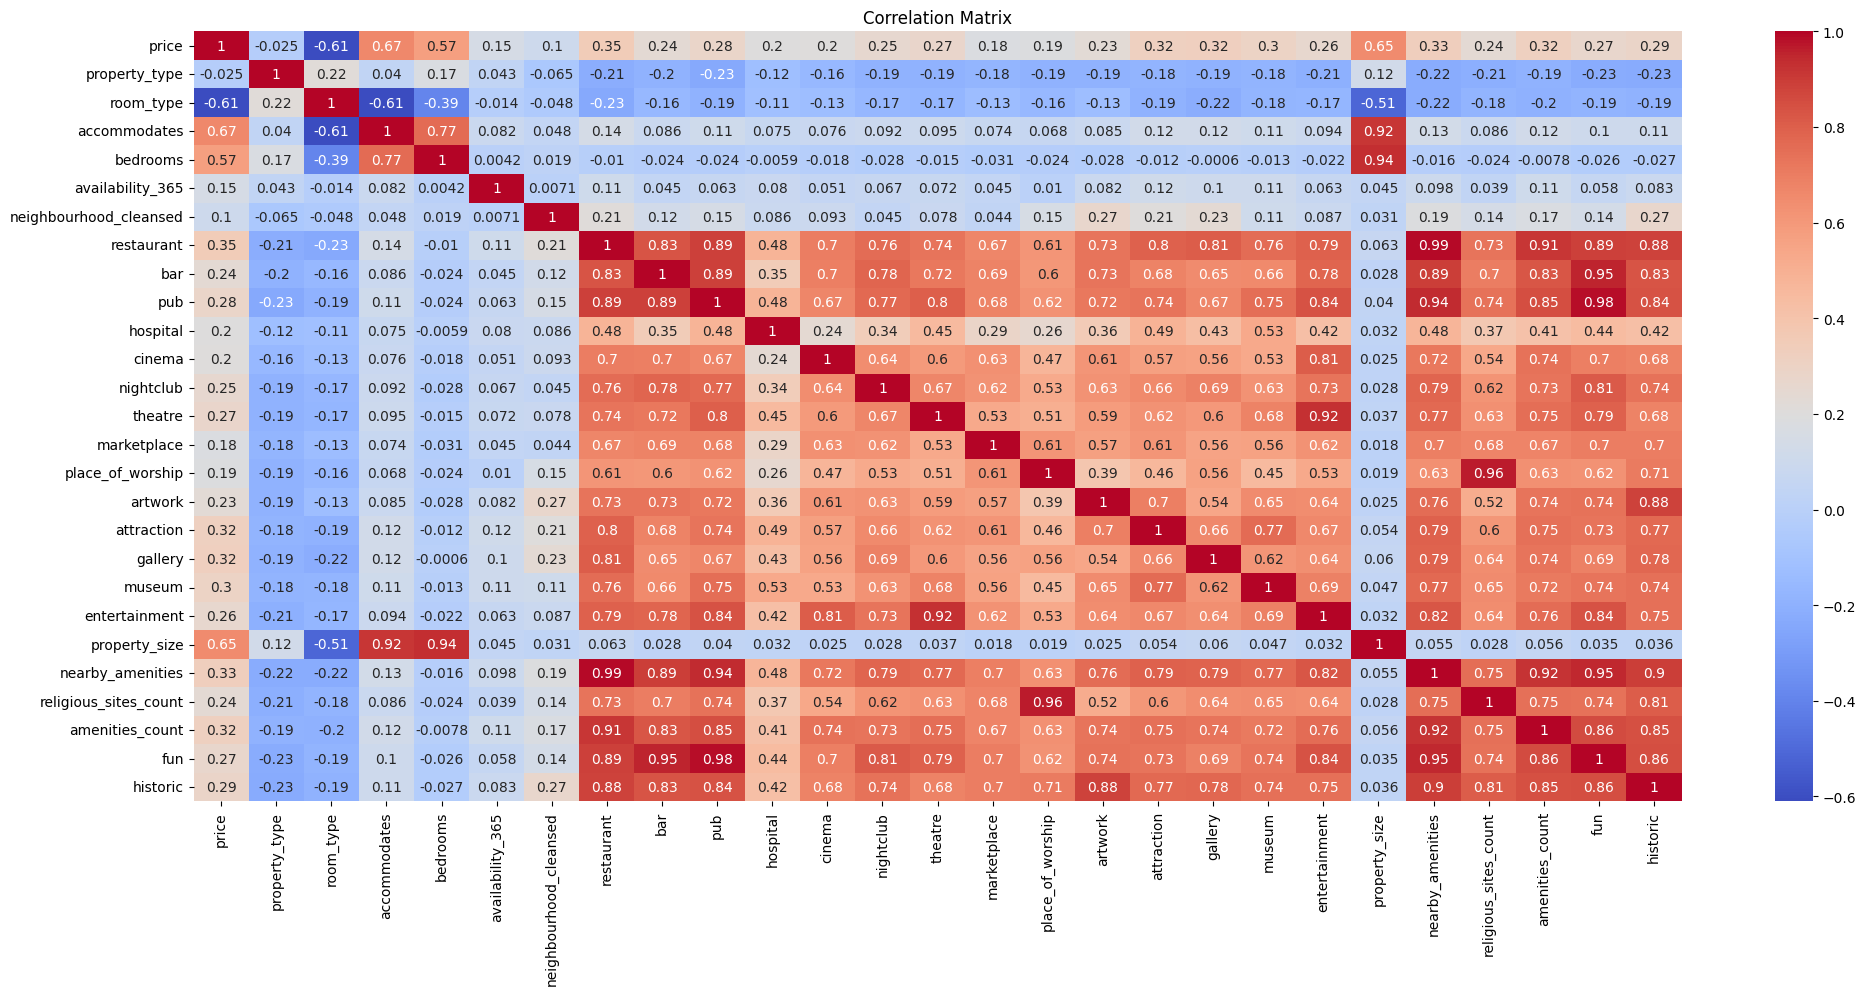

In [34]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics






airbnb_features_corr = ['price','property_type','room_type','accommodates','bedrooms','availability_365','neighbourhood_cleansed','restaurant','bar','pub','hospital','cinema','nightclub','theatre','marketplace','place_of_worship','artwork','attraction','gallery','museum','entertainment','property_size','nearby_amenities','religious_sites_count','amenities_count','fun','historic']

C = n_df

# print((n_df.price))



# Create a correlation matrix
corr_matrix = pd.DataFrame(C, columns=airbnb_features_corr).corr()

# Plot the correlation matrix
pyplot.figure(figsize=(24, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
pyplot.title('Correlation Matrix')
pyplot.show()





Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

Model

In [35]:
n_df = n_df.drop(columns=['place_of_worship','hospital'])
n_df.to_csv('airbnb_final.csv', index=False)

In [36]:
n_df.columns

Index(['Unnamed: 0.6', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'availability_365', 'viewpoint', 'restaurant', 'bar', 'pub', 'cinema',
       'nightclub', 'theatre', 'marketplace', 'artwork', 'attraction',
       'gallery', 'information', 'museum', 'picnic_site', 'entertainment',
       'property_size', 'nearby_amenities', 'amenities_count',
       'religious_sites_count', 'fun', 'historic'],
      dtype='object')

In [38]:
n_df = n_df.drop(columns=['Unnamed: 0.6'],axis=1)

[0.71530819 0.70153347 0.70090316 0.70068468 0.71289885 0.70451078
 0.6919151  0.70366795 0.7092057  0.71641163]
rmse: 40.707577225827045
The accuracy of our model is 69.82576259168161%


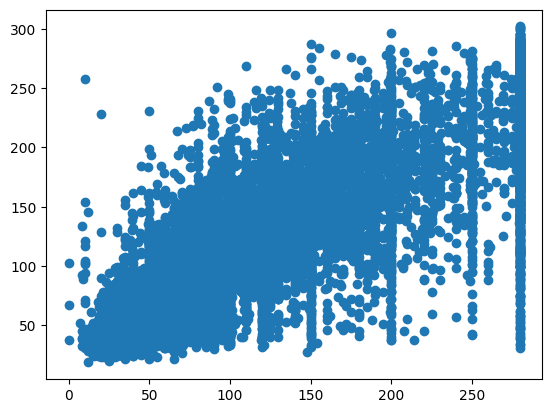

In [39]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# airbnb_features = ['property_type','accommodates','bedrooms','beds','restaurant','bar','pub','hospital','cinema','nightclub','theatre','marketplace','artwork','attraction','gallery','information','museum','viewpoint','entertainment','property_size','nearby_amenities','religious_sites_count','has_marketplace']
X = n_df.drop(columns=['price'])
y = n_df.price


import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# # Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
# rf_model = RandomForestRegressor(random_state=42)
# xgb_model = XGBRegressor(random_state=42)

# # Fit the models
# rf_model.fit(X_train, y_train)
# xgb_model.fit(X_train, y_train)

# # Make predictions
# rf_preds = rf_model.predict(X_test)
# xgb_preds = xgb_model.predict(X_test)

# # Calculate RMSE for individual models
# rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
# xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))

# print(f"Random Forest RMSE: {rf_rmse}")
# print(f"XGBoost RMSE: {xgb_rmse}")

# # Perform ensemble prediction by averaging the predictions of both models
# ensemble_preds = (rf_preds + xgb_preds) / 2

# # Calculate RMSE for ensemble predictions
# ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
# print(f"Ensemble RMSE: {ensemble_rmse}")


#splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


# poly_transformer = PolynomialFeatures(degree=3)
# X_train_poly = poly_transformer.fit_transform(X_train)
# X_test_poly = poly_transformer.transform(X_test)
# fit model no training data
#model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=7, n_estimators=100, oob_score=True)
model = XGBRegressor(n_estimators=300, max_depth=7, eta=0.1, learning_rate=0.1, subsample=0.9, colsample_bytree=0.8)



import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Define the hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best model and its hyperparameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate the best model on the test set
# y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)

# print("Best Hyperparameters:", best_params)
# print("Mean Squared Error:", mse)


model.fit(X_train, y_train)
# plot feature importance
predictions = model.predict(X_test)

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10)

print(cross_val_score(model, X, y, cv=cv))

from sklearn import metrics
import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_test,predictions))

print("rmse:",rmse)

pyplot.scatter(y_test,predictions)

from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
print("The accuracy of our model is {}%".format(score *100))

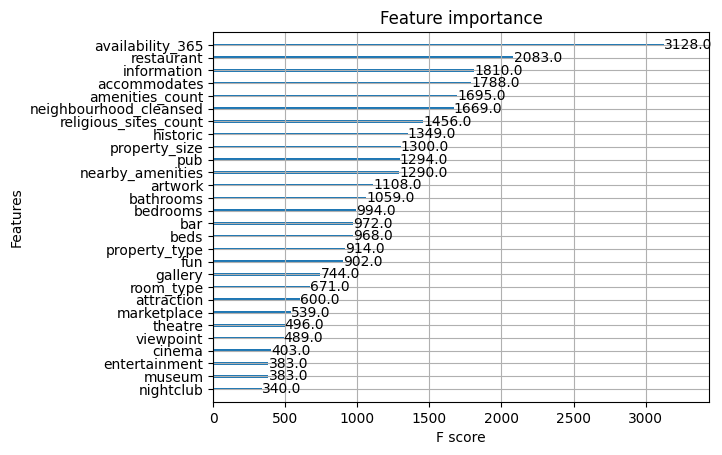

In [40]:
# plot
plot_importance(model)
pyplot.show()

In [41]:
import pickle

# Save the model to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [44]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

new_data = np.array([[18, 0, 1, 0.166666667, 1, 0.285714286, 0, 0, 0.983561644, 0, 0.255681818, 0.076923077, 0.229508197, 0.4, 0, 0.4, 0, 0.032258065, 0, 0, 0.509433962, 0, 0, 0.4, 0.117647059, 0.231263383, 0.091370558, 0.117647059, 0.163636364, 0.03960396]])

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data)

# Print the predictions
print(predictions)

[131.57437]
